In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Load the Loan data

Autoclaim = pd.read_csv(r"C:\1\Health Screening Data.csv", header=0)

# Copy to back-up file

Autoclaim_bk = Autoclaim.copy()

# Display first 5 values



In [2]:
Autoclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   69960 non-null  int64  
 1   id           69960 non-null  int64  
 2   age          69960 non-null  int64  
 3   gender       69960 non-null  int64  
 4   height       69960 non-null  int64  
 5   weight       69960 non-null  float64
 6   ap_hi        69960 non-null  int64  
 7   ap_lo        69960 non-null  int64  
 8   cholesterol  69960 non-null  int64  
 9   gluc         69960 non-null  int64  
 10  smoke        69960 non-null  int64  
 11  alco         69960 non-null  int64  
 12  active       69960 non-null  int64  
 13  cardio       69960 non-null  int64  
 14  AgeinYr      69960 non-null  int64  
 15  BMI          69960 non-null  float64
 16  BMICat       69960 non-null  object 
 17  AgeGroup     69960 non-null  object 
dtypes: float64(2), int64(14), object(2)
memory usa

In [3]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Autoclaim['BMICat'] = LE.fit_transform(Autoclaim[['BMICat']])

In [4]:
del Autoclaim['AgeGroup']

In [5]:
Autoclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   69960 non-null  int64  
 1   id           69960 non-null  int64  
 2   age          69960 non-null  int64  
 3   gender       69960 non-null  int64  
 4   height       69960 non-null  int64  
 5   weight       69960 non-null  float64
 6   ap_hi        69960 non-null  int64  
 7   ap_lo        69960 non-null  int64  
 8   cholesterol  69960 non-null  int64  
 9   gluc         69960 non-null  int64  
 10  smoke        69960 non-null  int64  
 11  alco         69960 non-null  int64  
 12  active       69960 non-null  int64  
 13  cardio       69960 non-null  int64  
 14  AgeinYr      69960 non-null  int64  
 15  BMI          69960 non-null  float64
 16  BMICat       69960 non-null  int32  
dtypes: float64(2), int32(1), int64(14)
memory usage: 8.8 MB


In [6]:
IndepVar = []
for col in Autoclaim.columns:
    if col != 'active':
        IndepVar.append(col)

TargetVar = 'active'

x = Autoclaim[IndepVar]
y = Autoclaim[TargetVar]
cols=['cholesterol','gluc','smoke','alco','cardio']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify=y, random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((41976, 16), (27984, 16), (41976,), (27984,))

In [8]:

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[22490     0]
 [ 5494     0]]
Outcome values : 
 22490 0 5494 0
Classification report : 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89     22490
           0       0.00      0.00      0.00      5494

    accuracy                           0.80     27984
   macro avg       0.40      0.50      0.45     27984
weighted avg       0.65      0.80      0.72     27984

Accuracy : 80.4 %
Precision : 80.4 %
Recall : 100.0 %
F1 Score : 0.891
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


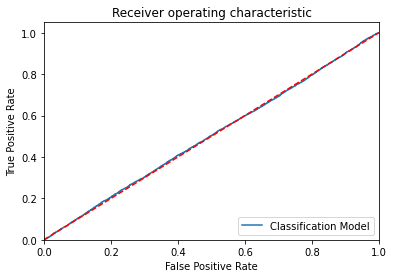

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[17736  4754]
 [ 4201  1293]]
Outcome values : 
 17736 4754 4201 1293
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.79      0.80     22490
           0       0.21      0.24      0.22      5494

    accuracy                           0.68     27984
   macro avg       0.51      0.51      0.51     27984
weighted avg       0.69      0.68      0.69     27984

Accuracy : 68.0 %
Precision : 80.8 %
Recall : 78.9 %
F1 Score : 0.798
Specificity or True Negative Rate : 23.5 %
Balanced Accuracy : 51.2 %
roc_auc_score: 0.512


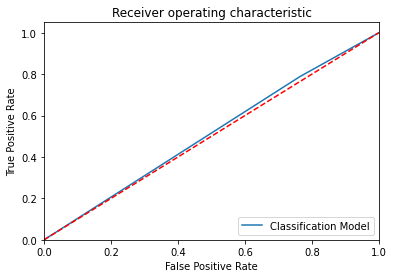

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[22383   107]
 [ 5440    54]]
Outcome values : 
 22383 107 5440 54
Classification report : 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89     22490
           0       0.34      0.01      0.02      5494

    accuracy                           0.80     27984
   macro avg       0.57      0.50      0.45     27984
weighted avg       0.71      0.80      0.72     27984

Accuracy : 80.2 %
Precision : 80.4 %
Recall : 99.5 %
F1 Score : 0.89
Specificity or True Negative Rate : 1.0 %
Balanced Accuracy : 50.2 %
roc_auc_score: 0.503


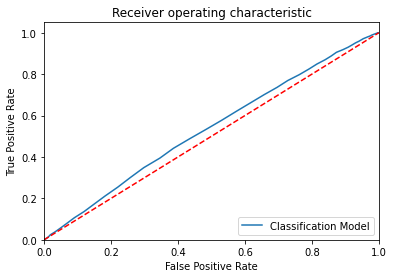

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[22101   389]
 [ 5371   123]]
Outcome values : 
 22101 389 5371 123
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.98      0.88     22490
           0       0.24      0.02      0.04      5494

    accuracy                           0.79     27984
   macro avg       0.52      0.50      0.46     27984
weighted avg       0.69      0.79      0.72     27984

Accuracy : 79.4 %
Precision : 80.4 %
Recall : 98.3 %
F1 Score : 0.885
Specificity or True Negative Rate : 2.2 %
Balanced Accuracy : 50.2 %
roc_auc_score: 0.503


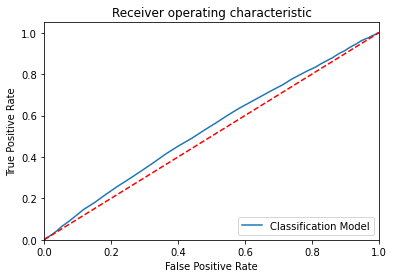

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[22480    10]
 [ 5488     6]]
Outcome values : 
 22480 10 5488 6
Classification report : 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89     22490
           0       0.38      0.00      0.00      5494

    accuracy                           0.80     27984
   macro avg       0.59      0.50      0.45     27984
weighted avg       0.72      0.80      0.72     27984

Accuracy : 80.4 %
Precision : 80.4 %
Recall : 100.0 %
F1 Score : 0.891
Specificity or True Negative Rate : 0.1 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


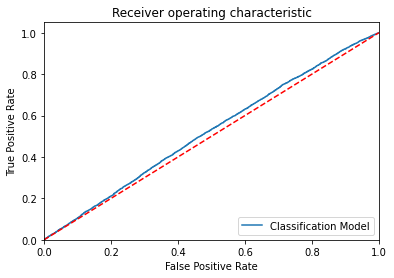

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[21288  1202]
 [ 5189   305]]
Outcome values : 
 21288 1202 5189 305
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.95      0.87     22490
           0       0.20      0.06      0.09      5494

    accuracy                           0.77     27984
   macro avg       0.50      0.50      0.48     27984
weighted avg       0.69      0.77      0.72     27984

Accuracy : 77.2 %
Precision : 80.4 %
Recall : 94.7 %
F1 Score : 0.869
Specificity or True Negative Rate : 5.6 %
Balanced Accuracy : 50.1 %
roc_auc_score: 0.501


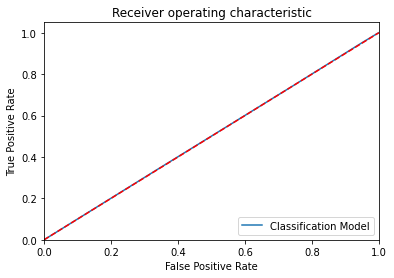

-----------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKN = KNeighborsClassifier()
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

bankdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)
# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET,modelGNB,ModelKN,bankdataSVMPoly]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------…

In [ ]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------------

In [12]:
Results = pd.read_csv(r"C:\Users\ABC\Downloads\HTRESULTS.csv", header=0)

Results.head(10)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[22490     0]
 [ 5494     0]]
Outcome values : 
 22490 0 5494 0
Classification report : 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89     22490
           0       0.00      0.00      0.00      5494

    accuracy                           0.80     27984
   macro avg       0.40      0.50      0.45     27984
weighted avg       0.65      0.80      0.72     27984

Accuracy : 80.4 %
Precision : 80.4 %
Recall : 100.0 %
F1 Score : 0.891
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


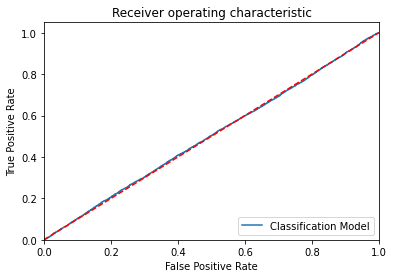

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[17801  4689]
 [ 4215  1279]]
Outcome values : 
 17801 4689 4215 1279
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.79      0.80     22490
           0       0.21      0.23      0.22      5494

    accuracy                           0.68     27984
   macro avg       0.51      0.51      0.51     27984
weighted avg       0.69      0.68      0.69     27984

Accuracy : 68.2 %
Precision : 80.9 %
Recall : 79.2 %
F1 Score : 0.8
Specificity or True Negative Rate : 23.3 %
Balanced Accuracy : 51.3 %
roc_auc_score: 0.512


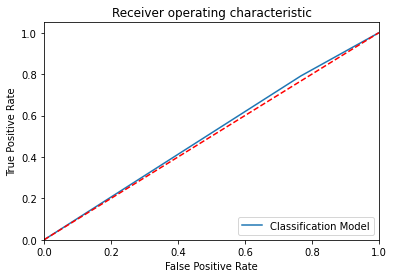

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[22386   104]
 [ 5434    60]]
Outcome values : 
 22386 104 5434 60
Classification report : 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89     22490
           0       0.37      0.01      0.02      5494

    accuracy                           0.80     27984
   macro avg       0.59      0.50      0.46     27984
weighted avg       0.72      0.80      0.72     27984

Accuracy : 80.2 %
Precision : 80.5 %
Recall : 99.5 %
F1 Score : 0.89
Specificity or True Negative Rate : 1.1 %
Balanced Accuracy : 50.3 %
roc_auc_score: 0.503


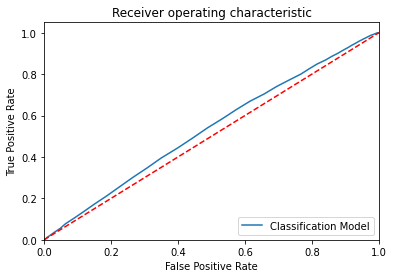

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[22124   366]
 [ 5358   136]]
Outcome values : 
 22124 366 5358 136
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.98      0.89     22490
           0       0.27      0.02      0.05      5494

    accuracy                           0.80     27984
   macro avg       0.54      0.50      0.47     27984
weighted avg       0.70      0.80      0.72     27984

Accuracy : 79.5 %
Precision : 80.5 %
Recall : 98.4 %
F1 Score : 0.885
Specificity or True Negative Rate : 2.5 %
Balanced Accuracy : 50.4 %
roc_auc_score: 0.504


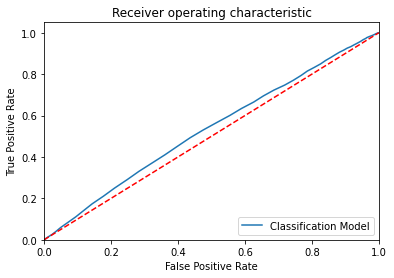

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[21288  1202]
 [ 5189   305]]
Outcome values : 
 21288 1202 5189 305
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.95      0.87     22490
           0       0.20      0.06      0.09      5494

    accuracy                           0.77     27984
   macro avg       0.50      0.50      0.48     27984
weighted avg       0.69      0.77      0.72     27984

Accuracy : 77.2 %
Precision : 80.4 %
Recall : 94.7 %
F1 Score : 0.869
Specificity or True Negative Rate : 5.6 %
Balanced Accuracy : 50.1 %
roc_auc_score: 0.501


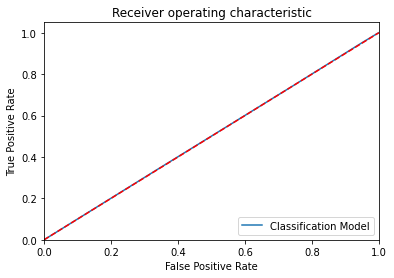

-----------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)